# Library and Data Imports and Standardization

In [1]:
# Make the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer, r2_score, root_mean_squared_error

# Import train test split
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from pprint import pprint

# Import Random Forest Regressor and Classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Import time
import time

# Import Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

# Import confusion matrix
from sklearn.metrics import confusion_matrix

# Import kfold
from sklearn.model_selection import KFold

# Import cross val score
from sklearn.model_selection import cross_val_score

# Import math
import math

# Import log2
from math import log2

# Import classification report
from sklearn.metrics import classification_report

np.random.seed(42)

# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# path = '/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/'
path = 'data/'
convabuse_filename = 'convabuse_final.csv'
dghs_filename = 'dynamically_generated_hate_speech_dataset_final.csv'
oaa_filename = 'online_abusive_attacks_final.csv'
us2020hs_filename = 'us_elections_2020_hate_speech_final.csv'
mlma_hate_speech_filename = 'MLMA_hate_speech_final.csv'

In [7]:
# Import the datasets
convabuse = pd.read_csv(f'{path}{convabuse_filename}')
dynamically_generated_hate_speech = pd.read_csv(f'{path}{dghs_filename}')
online_abusive_attacks = pd.read_csv(f'{path}{oaa_filename}')
us_elections_2020_hate_speech = pd.read_csv(f'{path}{us2020hs_filename}')
mlma_hate_speech = pd.read_csv(f'{path}{mlma_hate_speech_filename}')
mlma_hate_speech_sample = mlma_hate_speech.sample(frac=0.3, random_state=42)

In [8]:
convabuse.head()

,example_no,annotator_id,bot,ableism,homophobic,intellectual,racist,sexist,sex_harassment,transphobic,generalised,individual,system,explicit,implicit,abuse_level
0,0,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,7,CarbonBot,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
convabuse_X = convabuse.drop("abuse_level", axis=1)
convabuse_y = convabuse["abuse_level"]

In [10]:
dynamically_generated_hate_speech.head()

,label,type,annotator,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,original
0,1.0,0,16,0,0,0,0,0,0,0,0,1,1
1,1.0,-1,9,0,0,0,0,0,0,1,0,0,1
2,1.0,-1,16,1,0,0,0,0,0,0,0,0,1
3,1.0,0,2,0,0,0,0,0,0,0,0,1,1
4,1.0,-1,17,1,0,0,0,0,0,0,0,0,1


In [11]:
dghs_X = dynamically_generated_hate_speech.drop("label", axis=1)
dghs_y = dynamically_generated_hate_speech["label"]

In [12]:
online_abusive_attacks.head()

,verified,high Identity_Attack,high Insult,high Profanity,high Threat,high other attr,Toxicity
0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2.0,0.0,10.0,0.0,0.0,1.0
2,0,17.0,1.0,25.0,1.0,0.0,1.0
3,0,9.0,2.0,33.0,2.0,0.0,3.0
4,0,0.0,0.0,7.0,0.0,0.0,0.0


In [13]:
online_abusive_attacks_X = online_abusive_attacks.drop("Toxicity", axis=1)
online_abusive_attacks_y = online_abusive_attacks["Toxicity"]

In [14]:
us_elections_2020_hate_speech.head()

,index,Trump,Biden,HOF
0,873,1.0,4.0,1
1,2947,0.0,3.0,1
2,2274,0.0,4.0,1
3,902,1.0,4.0,1
4,554,4.0,1.0,1


In [15]:
us2020hs_X = us_elections_2020_hate_speech.drop("HOF", axis=1)
us2020hs_y = us_elections_2020_hate_speech["HOF"]

In [16]:
mlma_hate_speech.head()

,HITId,directness,shock_annotator_sentiment,anger_annotator_sentiment,confusion_annotator_sentiment,sadness_annotator_sentiment,indifference_annotator_sentiment,disgust_annotator_sentiment,fear_annotator_sentiment,hateful_sentiment,normal_sentiment,offensive_sentiment,disrespectful_sentiment,abusive_sentiment,fearful_sentiment,target_group
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
mlma_hate_speech_X = mlma_hate_speech.drop("target_group", axis=1)
mlma_hate_speech_y = mlma_hate_speech["target_group"]
mlma_hate_speech_X_sample = mlma_hate_speech_sample.drop("target_group", axis=1)
mlma_hate_speech_y_sample = mlma_hate_speech_sample["target_group"]

In [18]:
# Implement KFold
convabuse_kf = KFold(n_splits=5, shuffle=True, random_state=42)
dghs_kf = KFold(n_splits=5, shuffle=True, random_state=42)
online_abusive_attacks_kf = KFold(n_splits=5, shuffle=True, random_state=42)
us2020hs_kf = KFold(n_splits=5, shuffle=True, random_state=42)
mlma_hate_speech_kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Linear Modeling

In [19]:
# Get only the numeric features for each dataset
convabuse_X_numeric = convabuse_X.select_dtypes(include=np.number)
dghs_X_numeric = dghs_X.select_dtypes(include=np.number)
online_abusive_attacks_X_numeric = online_abusive_attacks_X.select_dtypes(include=np.number)
us2020hs_X_numeric = us2020hs_X.select_dtypes(include=np.number)
mlma_hate_speech_X_numeric = mlma_hate_speech_X.select_dtypes(include=np.number)
mlma_hate_speech_X_numeric_sample = mlma_hate_speech_X_sample.select_dtypes(include=np.number)

In [20]:
# Use standard scaler on the Convabuse X data
convabuse_scaler = StandardScaler()
convabuse_X_scaled = convabuse_scaler.fit_transform(convabuse_X_numeric)
convabuse_X_scaled = pd.DataFrame(convabuse_X_scaled, columns=convabuse_X_numeric.columns)

In [21]:
# Use standard scaler on the Dynamically Generated Hate Speech X data
dghs_scaler = StandardScaler()
dghs_X_scaled = dghs_scaler.fit_transform(dghs_X_numeric)
dghs_X_scaled = pd.DataFrame(dghs_X_scaled, columns=dghs_X_numeric.columns)

In [22]:
# Use standard scaler on the online abusive attacks X data
oaa_scaler = StandardScaler()
online_abusive_attacks_X_scaled = oaa_scaler.fit_transform(online_abusive_attacks_X_numeric)
online_abusive_attacks_X_scaled = pd.DataFrame(online_abusive_attacks_X_scaled, columns=online_abusive_attacks_X_numeric.columns)

In [23]:
# Use standard scaler on the US elections 2020 hate speech X data
us2020hs_scaler = StandardScaler()
us2020hs_X_scaled = us2020hs_scaler.fit_transform(us2020hs_X_numeric)
us2020hs_X_scaled = pd.DataFrame(us2020hs_X_scaled, columns=us2020hs_X_numeric.columns)

In [24]:
# Use standard scaler on the MLMA hate speech X data
mlma_hate_speech_scaler = StandardScaler()
mlma_hate_speech_X_scaled = mlma_hate_speech_scaler.fit_transform(mlma_hate_speech_X_numeric)
mlma_hate_speech_X_scaled = pd.DataFrame(mlma_hate_speech_X_scaled, columns=mlma_hate_speech_X_numeric.columns)

In [25]:
# Use standard scaler on the MLMA hate speech X sample data
mlma_hate_speech_sample_scaler = StandardScaler()
mlma_hate_speech_X_sample_scaled = mlma_hate_speech_sample_scaler.fit_transform(mlma_hate_speech_X_numeric_sample)
mlma_hate_speech_X_sample_scaled = pd.DataFrame(mlma_hate_speech_X_sample_scaled, columns=mlma_hate_speech_X_numeric_sample.columns)

In [26]:
for columns in [convabuse_X_numeric.columns, dghs_X_numeric.columns, online_abusive_attacks_X_numeric.columns, us2020hs_X_numeric.columns, mlma_hate_speech_X_numeric.columns]:
  print(columns)

Index(['example_no', 'annotator_id', 'ableism', 'homophobic', 'intellectual',
       'racist', 'sexist', 'sex_harassment', 'transphobic', 'generalised',
       'individual', 'system', 'explicit', 'implicit'],
      dtype='object')
Index(['type', 'annotator', 'race_or_ethnicity', 'gender', 'religion', 'lgbtq',
       'nationality', 'age', 'disability', 'class', 'none', 'original'],
      dtype='object')
Index(['verified', 'high Identity_Attack', 'high Insult', 'high Profanity',
       'high Threat', 'high other attr'],
      dtype='object')
Index(['index', 'Trump', 'Biden'], dtype='object')
Index(['HITId', 'directness', 'shock_annotator_sentiment',
       'anger_annotator_sentiment', 'confusion_annotator_sentiment',
       'sadness_annotator_sentiment', 'indifference_annotator_sentiment',
       'disgust_annotator_sentiment', 'fear_annotator_sentiment',
       'hateful_sentiment', 'normal_sentiment', 'offensive_sentiment',
       'disrespectful_sentiment', 'abusive_sentiment', 'fearful_

In [27]:
# Train test split for each dataset
convabuse_X_train, convabuse_X_test, convabuse_y_train, convabuse_y_test = train_test_split(convabuse_X_scaled, convabuse_y, test_size=0.2, random_state=42)
dghs_X_train, dghs_X_test, dghs_y_train, dghs_y_test = train_test_split(dghs_X_scaled, dghs_y, test_size=0.2, random_state=42)
online_abusive_attacks_X_train, online_abusive_attacks_X_test, online_abusive_attacks_y_train, online_abusive_attacks_y_test = train_test_split(online_abusive_attacks_X_scaled, online_abusive_attacks_y, test_size=0.8, random_state=42)
us2020hs_X_train, us2020hs_X_test, us2020hs_y_train, us2020hs_y_test = train_test_split(us2020hs_X_scaled, us2020hs_y, test_size=0.2, random_state=42)
mlma_hate_speech_X_train, mlma_hate_speech_X_test, mlma_hate_speech_y_train, mlma_hate_speech_y_test = train_test_split(mlma_hate_speech_X_scaled, mlma_hate_speech_y, test_size=0.2, random_state=42)
mlma_hate_speech_X_train_sample, mlma_hate_speech_X_test_sample, mlma_hate_speech_y_train_sample, mlma_hate_speech_y_test_sample = train_test_split(mlma_hate_speech_X_sample_scaled, mlma_hate_speech_y_sample, test_size=0.2, random_state=42)

In [28]:
# Get the length of each dataset
convabuse_length = len(convabuse_X_train)
dghs_length = len(dghs_X_train)
online_abusive_attacks_length = len(online_abusive_attacks_X_train)
us2020hs_length = len(us2020hs_X_train)
mlma_hate_speech_length = len(mlma_hate_speech_X_train)
mlma_hate_speech_sample_length = len(mlma_hate_speech_X_train_sample)

In [29]:
convabuse_log2 = math.ceil(log2(convabuse_length))
convabuse_1_percent = math.ceil(convabuse_length * 0.01)
convabuse_length, convabuse_log2, convabuse_1_percent

(40272, 16, 403)

In [30]:
dghs_log2 = math.ceil(log2(dghs_length))
dghs_1_percent = math.ceil(dghs_length * 0.01)
dghs_length, dghs_log2, dghs_1_percent

(30350, 15, 304)

In [31]:
online_abusive_attacks_log2 = math.ceil(log2(online_abusive_attacks_length))
online_abusive_attacks_1_percent = math.ceil(online_abusive_attacks_length * 0.01)
online_abusive_attacks_length, online_abusive_attacks_log2, online_abusive_attacks_1_percent

(473, 9, 5)

In [32]:
us2020hs_log2 = math.ceil(log2(us2020hs_length))
us2020hs_1_percent = math.ceil(us2020hs_length * 0.01)
us2020hs_length, us2020hs_log2, us2020hs_1_percent

(4236, 13, 43)

In [33]:
mlma_hate_speech_log2 = math.ceil(log2(mlma_hate_speech_length))
mlma_hate_speech_1_percent = math.ceil(mlma_hate_speech_length * 0.01)
mlma_hate_speech_length, mlma_hate_speech_log2, mlma_hate_speech_1_percent

(174874, 18, 1749)

In [34]:
mlma_hate_speech_sample_log2 = math.ceil(log2(mlma_hate_speech_sample_length))
mlma_hate_speech_sample_1_percent = math.ceil(mlma_hate_speech_sample_length * 0.01)
mlma_hate_speech_sample_length, mlma_hate_speech_sample_log2, mlma_hate_speech_sample_1_percent

(52462, 16, 525)

In [97]:
rf_regression_results_list = []

In [98]:
rf_classification_results_list = []

## Convabuse Decision Tree

In [37]:
convabuse_y_test.value_counts()

abuse_level
0    2067
2    2058
3    2000
1    1972
4    1971
Name: count, dtype: int64

In [50]:
convabuse_1_percent

403

In [99]:
# Random Forest Classifier pipeline for Convabuse dataset
convabuse_rf_pipeline = Pipeline([
    ('rf_classifier', RandomForestClassifier(random_state=42))
])

# Set the parameters for Randomized Search for Random Forest Classifier on the Convabuse dataset
convabuse_rf_param_grid = {
    'rf_classifier__n_estimators': range(140, 180),
    'rf_classifier__max_depth': range(1, convabuse_log2),
    'rf_classifier__min_samples_split': [convabuse_1_percent * i for i in range(2, 6)],
    'rf_classifier__min_samples_leaf': [convabuse_1_percent * i for i in range(1, 6)],
    'rf_classifier__criterion': ['gini']
}

In [100]:
start_time = time.time()
convabuse_class_scorer = make_scorer(accuracy_score, greater_is_better=True)

convabuse_rf_random_search = RandomizedSearchCV(convabuse_rf_pipeline,
                                                   param_distributions=convabuse_rf_param_grid,
                                                   n_iter=10,
                                                   cv=convabuse_kf,
                                                   scoring=convabuse_class_scorer,
                                                   random_state=42)
convabuse_rf_random_search.fit(convabuse_X_train, convabuse_y_train)
end_time = time.time()
print("Best parameters for Convabuse Random Forest Classifier:", convabuse_rf_random_search.best_params_)
print("Best score for Convabuse Random Forest Classifier:", convabuse_rf_random_search.best_score_)
print("Time taken for Convabuse Random Forest Classifier Randomized Search:", end_time - start_time)

Best parameters for Convabuse Random Forest Classifier: {'rf_classifier__n_estimators': 170, 'rf_classifier__min_samples_split': 1209, 'rf_classifier__min_samples_leaf': 403, 'rf_classifier__max_depth': 10, 'rf_classifier__criterion': 'gini'}
Best score for Convabuse Random Forest Classifier: 0.571886615130612
Time taken for Convabuse Random Forest Classifier Randomized Search: 34.879639625549316


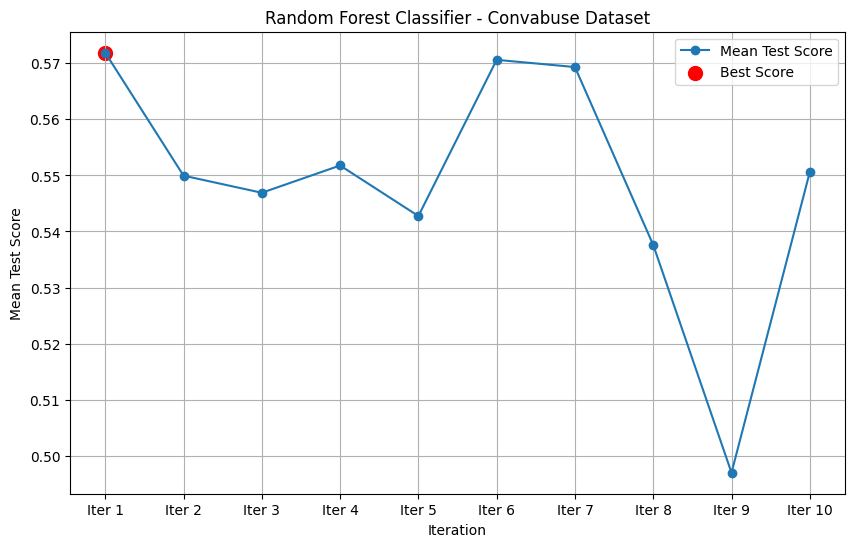

In [101]:
# Plot the accuracy scores for the Random Forest Classifier on the US Accidents dataset for all iterations
plt.figure(figsize=(10, 6))
plt.plot(convabuse_rf_random_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot the best score as a red x
convabuse_rf_best_score_index = np.argmax(convabuse_rf_random_search.cv_results_['mean_test_score'])
plt.scatter(convabuse_rf_best_score_index, convabuse_rf_random_search.cv_results_['mean_test_score'][convabuse_rf_best_score_index], color='red', s=100, label='Best Score')

plt.title('Random Forest Classifier - Convabuse Dataset')
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score')
plt.xticks(range(len(convabuse_rf_random_search.cv_results_['mean_test_score'])),
           [f"Iter {i+1}" for i in range(len(convabuse_rf_random_search.cv_results_['mean_test_score']))])
plt.legend()
plt.grid()
plt.show()

In [102]:
# Predict on the test set
convabuse_rf_y_pred = convabuse_rf_random_search.predict(convabuse_X_test)

In [103]:
# Evaluate the model
convabuse_rf_accuracy = accuracy_score(convabuse_y_test, convabuse_rf_y_pred)
convabuse_rf_f1 = f1_score(convabuse_y_test, convabuse_rf_y_pred, average='weighted')

print("Convabuse Random Forest Classifier:")
print(f"Best Parameters: {convabuse_rf_random_search.best_params_}")
print(f"Accuracy: {convabuse_rf_accuracy:.4f}")
print(f"F1 Score: {convabuse_rf_f1:.4f}")

Convabuse Random Forest Classifier:
Best Parameters: {'rf_classifier__n_estimators': 170, 'rf_classifier__min_samples_split': 1209, 'rf_classifier__min_samples_leaf': 403, 'rf_classifier__max_depth': 10, 'rf_classifier__criterion': 'gini'}
Accuracy: 0.5851
F1 Score: 0.5802


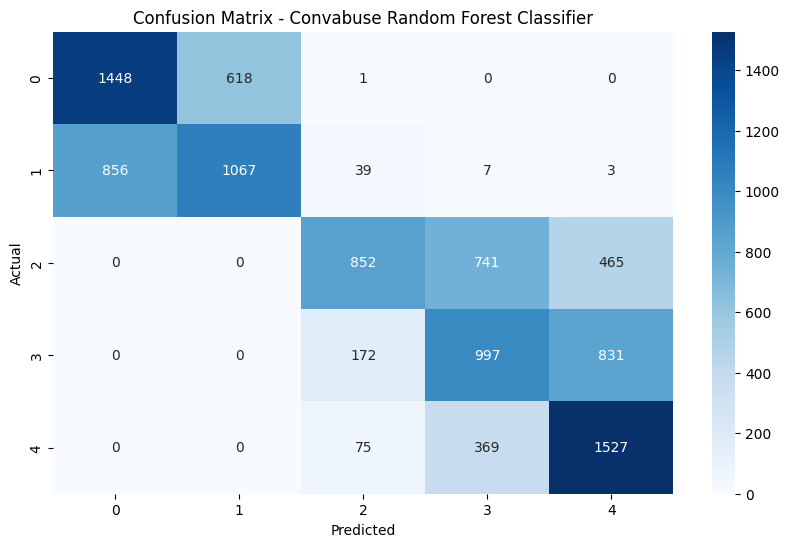

In [104]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(convabuse_y_test, convabuse_rf_y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Convabuse Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [105]:
# Generate a classification report for the Random Forest Classifier on the Convabuse dataset
convabuse_rf_report = classification_report(convabuse_y_test, convabuse_rf_y_pred)
print("Classification Report for Convabuse Random Forest Classifier:")
print(convabuse_rf_report)

Classification Report for Convabuse Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.63      0.70      0.66      2067
           1       0.63      0.54      0.58      1972
           2       0.75      0.41      0.53      2058
           3       0.47      0.50      0.48      2000
           4       0.54      0.77      0.64      1971

    accuracy                           0.59     10068
   macro avg       0.60      0.59      0.58     10068
weighted avg       0.61      0.59      0.58     10068



In [106]:
# Append details to the results list
rf_classification_results_list.append((
    "Random Forest",
    "Convabuse",
    "NA",
    "NA",
    convabuse_rf_accuracy,
    convabuse_rf_f1,
    0.0,
    convabuse_rf_random_search.best_params_
))

## Dynamically Generated Hate Speech Decision Tree

In [107]:
dghs_y_test.value_counts()

label
1.0    3800
0.0    3788
Name: count, dtype: int64

In [130]:
# Random Forest Classifier pipeline for DGHS dataset
dghs_rf_pipeline = Pipeline([
    ('rf_classifier', RandomForestClassifier(random_state=42))
])

# Set the parameters for Randomized Search for Random Forest Classifier on the DGHS dataset
dghs_rf_param_grid = {
    'rf_classifier__n_estimators': range(590, 610),
    'rf_classifier__max_depth': range(1, dghs_log2),
    'rf_classifier__min_samples_split': [dghs_1_percent * i for i in range(2, 6)],
    'rf_classifier__min_samples_leaf': [dghs_1_percent * i for i in range(1, 6)],
    'rf_classifier__criterion': ['gini', 'entropy']
}

In [131]:
start_time = time.time()
dghs_class_scorer = make_scorer(accuracy_score, greater_is_better=True)

dghs_rf_random_search = RandomizedSearchCV(dghs_rf_pipeline,
                                           param_distributions=dghs_rf_param_grid,
                                           n_iter=10,
                                           cv=dghs_kf,
                                           scoring=dghs_class_scorer,
                                           random_state=42)
dghs_rf_random_search.fit(dghs_X_train, dghs_y_train)
end_time = time.time()
print("Best parameters for Dynamically Generated Hate Speech Random Forest Classifier:", dghs_rf_random_search.best_params_)
print("Best score for Dynamically Generated Hate Speech Random Forest Classifier:", dghs_rf_random_search.best_score_)
print("Time taken for Dynamically Generated Hate Speech Random Forest Classifier Randomized Search:", end_time - start_time)

Best parameters for Dynamically Generated Hate Speech Random Forest Classifier: {'rf_classifier__n_estimators': 600, 'rf_classifier__min_samples_split': 1520, 'rf_classifier__min_samples_leaf': 304, 'rf_classifier__max_depth': 5, 'rf_classifier__criterion': 'entropy'}
Best score for Dynamically Generated Hate Speech Random Forest Classifier: 0.8382207578253708
Time taken for Dynamically Generated Hate Speech Random Forest Classifier Randomized Search: 68.63620471954346


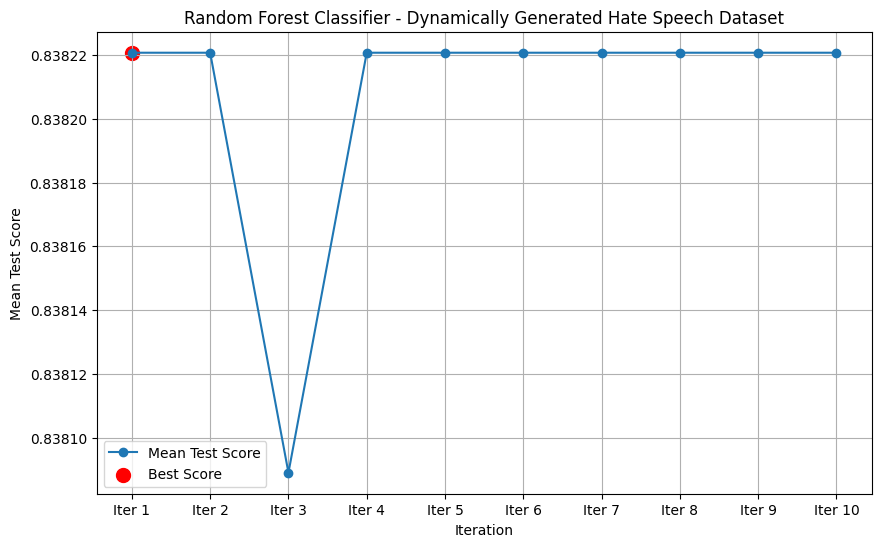

In [137]:
# Plot the accuracy scores for the Random Forest Classifier on the US Accidents dataset for all iterations
plt.figure(figsize=(10, 6))
plt.plot(dghs_rf_random_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot the best score as a red x
dghs_rf_best_score_index = np.argmax(dghs_rf_random_search.cv_results_['mean_test_score'])
plt.scatter(dghs_rf_best_score_index, dghs_rf_random_search.cv_results_['mean_test_score'][dghs_rf_best_score_index], color='red', s=100, label='Best Score')

plt.title('Random Forest Classifier - Dynamically Generated Hate Speech Dataset')
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score')
plt.xticks(range(len(dghs_rf_random_search.cv_results_['mean_test_score'])),
           [f"Iter {i+1}" for i in range(len(dghs_rf_random_search.cv_results_['mean_test_score']))])
plt.legend()
plt.grid()
plt.show()

In [138]:
# Predict on the test set
dghs_rf_y_pred = dghs_rf_random_search.predict(dghs_X_test)

In [139]:
# Evaluate the model
dghs_rf_accuracy = accuracy_score(dghs_y_test, dghs_rf_y_pred)
dghs_rf_f1 = f1_score(dghs_y_test, dghs_rf_y_pred, average='weighted')

print("Dynamically Generated Hate Speech Random Forest Classifier:")
print(f"Best Parameters: {dghs_rf_random_search.best_params_}")
print(f"Accuracy: {dghs_rf_accuracy:.4f}")
print(f"F1 Score: {dghs_rf_f1:.4f}")

Dynamically Generated Hate Speech Random Forest Classifier:
Best Parameters: {'rf_classifier__n_estimators': 600, 'rf_classifier__min_samples_split': 1520, 'rf_classifier__min_samples_leaf': 304, 'rf_classifier__max_depth': 5, 'rf_classifier__criterion': 'entropy'}
Accuracy: 0.8378
F1 Score: 0.8334


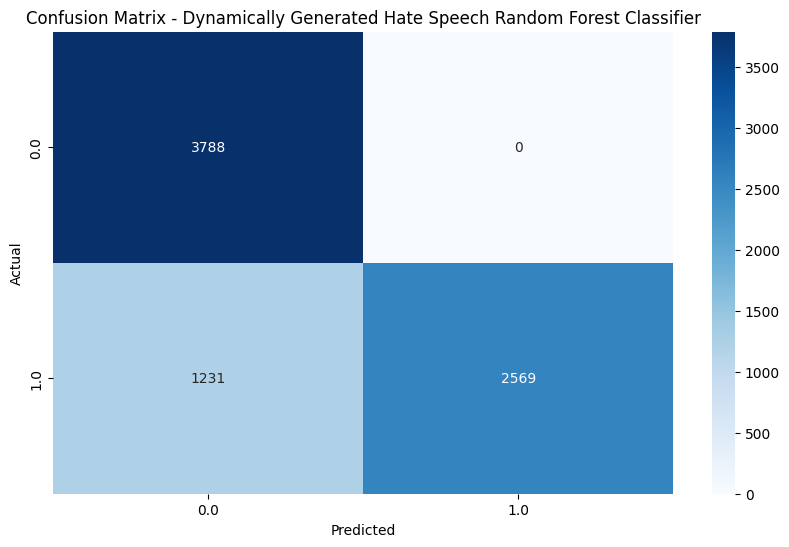

In [140]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(dghs_y_test, dghs_rf_y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Dynamically Generated Hate Speech Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [141]:
# Generate a classification report for the Random Forest Classifier on the Dynamically Generated Hate Speech dataset
dghs_rf_report = classification_report(dghs_y_test, dghs_rf_y_pred)
print("Classification Report for Dynamically Generated Hate Speech Random Forest Classifier:")
print(dghs_rf_report)

Classification Report for Dynamically Generated Hate Speech Random Forest Classifier:
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      3788
         1.0       1.00      0.68      0.81      3800

    accuracy                           0.84      7588
   macro avg       0.88      0.84      0.83      7588
weighted avg       0.88      0.84      0.83      7588



In [142]:
# Append details to the results list
rf_classification_results_list.append((
    "Random Forest",
    "Dynamically Generated Hate Speech",
    "NA",
    "NA",
    dghs_rf_accuracy,
    dghs_rf_f1,
    0.0,
    dghs_rf_random_search.best_params_
))

In [143]:
online_abusive_attacks_y_test.value_counts()

Toxicity
0.0      1729
1.0        72
2.0        22
3.0         9
10.0        8
5.0         7
6.0         6
4.0         5
7.0         3
15.0        3
9.0         3
11.0        3
12.0        2
18.0        2
45.0        2
66.0        1
178.0       1
190.0       1
197.0       1
123.0       1
28.0        1
8.0         1
50.0        1
36.0        1
40.0        1
22.0        1
24.0        1
25.0        1
17.0        1
44.0        1
79.0        1
Name: count, dtype: int64

In [159]:
# Random Forest Regressor pipeline for online_abusive_attacks dataset
online_abusive_attacks_rf_pipeline = Pipeline([
    ('rf_regressor', RandomForestRegressor(random_state=42))
])

# Set the parameters for Randomized Search for Random Forest Regressor on the online_abusive_attacks dataset
online_abusive_attacks_rf_param_grid = {
    'rf_regressor__max_depth': range(1, online_abusive_attacks_log2),
    'rf_regressor__min_samples_split': [online_abusive_attacks_1_percent * i for i in range(2, 6)],
    'rf_regressor__min_samples_leaf': [online_abusive_attacks_1_percent * i for i in range(1, 6)],
    'rf_regressor__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
}

In [163]:
start_time = time.time()
online_abusive_attacks_r2_scorer = make_scorer(r2_score, greater_is_better=True)

online_abusive_attacks_rf_random_search = RandomizedSearchCV(online_abusive_attacks_rf_pipeline,
                                                   param_distributions=online_abusive_attacks_rf_param_grid,
                                                   n_iter=10,
                                                   cv=online_abusive_attacks_kf,
                                                   scoring=online_abusive_attacks_r2_scorer,
                                                   random_state=42)
online_abusive_attacks_rf_random_search.fit(online_abusive_attacks_X_train, online_abusive_attacks_y_train)
end_time = time.time()
print("Best parameters for Online Abusive Attacks Random Forest Regressor:", online_abusive_attacks_rf_random_search.best_params_)
print("Best score for Online Abusive Attacks Random Forest Regressor:", online_abusive_attacks_rf_random_search.best_score_)
print("Time taken for Online Abusive Attacks Random Forest Regressor Randomized Search:", end_time - start_time)

Best parameters for Online Abusive Attacks Random Forest Regressor: {'rf_regressor__min_samples_split': 25, 'rf_regressor__min_samples_leaf': 10, 'rf_regressor__max_depth': 5, 'rf_regressor__criterion': 'absolute_error'}
Best score for Online Abusive Attacks Random Forest Regressor: 0.41462441204570294
Time taken for Online Abusive Attacks Random Forest Regressor Randomized Search: 3.6348824501037598


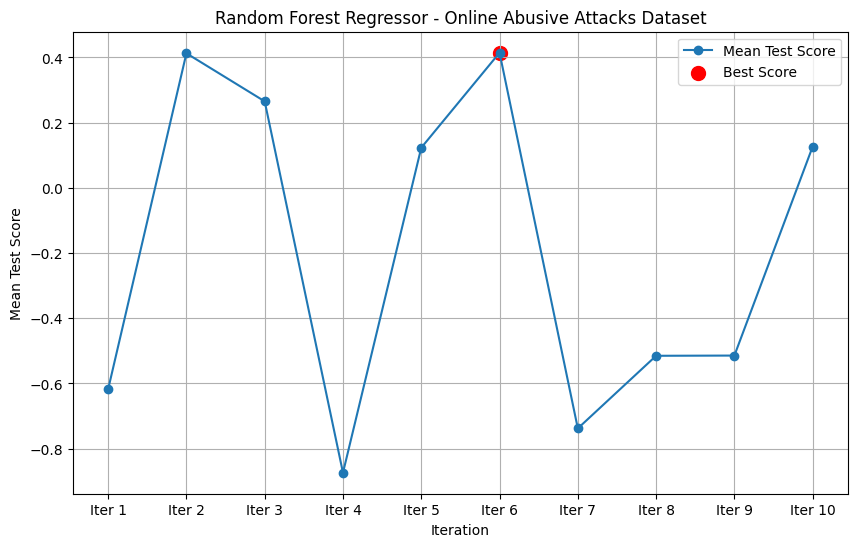

In [164]:
# Plot the accuracy scores for the Random Forest Regressor on the Online Abusive Attacks dataset for all iterations
plt.figure(figsize=(10, 6))
plt.plot(online_abusive_attacks_rf_random_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot the best score as a red x
online_abusive_attacks_rf_best_score_index = np.argmax(online_abusive_attacks_rf_random_search.cv_results_['mean_test_score'])
plt.scatter(online_abusive_attacks_rf_best_score_index, online_abusive_attacks_rf_random_search.cv_results_['mean_test_score'][online_abusive_attacks_rf_best_score_index], color='red', s=100, label='Best Score')

plt.title('Random Forest Regressor - Online Abusive Attacks Dataset')
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score')
plt.xticks(range(len(online_abusive_attacks_rf_random_search.cv_results_['mean_test_score'])),
           [f"Iter {i+1}" for i in range(len(online_abusive_attacks_rf_random_search.cv_results_['mean_test_score']))])
plt.legend()
plt.grid()
plt.show()

In [165]:
# Predict on the test set
online_abusive_attacks_rf_y_pred = online_abusive_attacks_rf_random_search.predict(online_abusive_attacks_X_test)

In [166]:
# Evaluate the model
online_abusive_attacks_rf_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_rf_y_pred)
online_abusive_attacks_rf_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_rf_y_pred)

print("Dynamically Generated Hate Speech Random Forest Regressor:")
print(f"Best Parameters: {online_abusive_attacks_rf_random_search.best_params_}")
print(f"R-squared Score: {online_abusive_attacks_rf_r2:.4f}")
print(f"RMSE Score: {online_abusive_attacks_rf_rmse:.4f}")

Dynamically Generated Hate Speech Random Forest Regressor:
Best Parameters: {'rf_regressor__min_samples_split': 25, 'rf_regressor__min_samples_leaf': 10, 'rf_regressor__max_depth': 5, 'rf_regressor__criterion': 'absolute_error'}
R-squared Score: 0.1568
RMSE Score: 8.1443


In [167]:
# Append details to the results list
rf_regression_results_list.append((
    "Random Forest",
    "Online Abusive Attacks",
    online_abusive_attacks_rf_rmse,
    online_abusive_attacks_rf_r2,
    online_abusive_attacks_rf_random_search.best_params_
))

In [168]:
us2020hs_y_test.value_counts()

HOF
1    545
0    515
Name: count, dtype: int64

In [186]:
# Random Forest Classifier pipeline for us2020hs dataset
us2020hs_rf_pipeline = Pipeline([
    ('rf_classifier', RandomForestClassifier(random_state=42))
])

# Set the parameters for Randomized Search for Random Forest Classifier on the us2020hs dataset
us2020hs_rf_param_grid = {
    'rf_classifier__n_estimators': range(950, 1000),
    'rf_classifier__max_depth': [us2020hs_log2],
    'rf_classifier__min_samples_split': [us2020hs_1_percent * i for i in range(2, 6)],
    'rf_classifier__min_samples_leaf': [us2020hs_1_percent * i for i in range(1, 6)],
    'rf_classifier__criterion': ['gini', 'entropy']
}

In [187]:
start_time = time.time()
us2020hs_class_scorer = make_scorer(accuracy_score, greater_is_better=True)

us2020hs_rf_random_search = RandomizedSearchCV(us2020hs_rf_pipeline,
                                                   param_distributions=us2020hs_rf_param_grid,
                                                   n_iter=10,
                                                   cv=us2020hs_kf,
                                                   scoring=us2020hs_class_scorer,
                                                   random_state=42)
us2020hs_rf_random_search.fit(us2020hs_X_train, us2020hs_y_train)
end_time = time.time()
print("Best parameters for US Elections 2020 Hate Speech Random Forest Classifier:", us2020hs_rf_random_search.best_params_)
print("Best score for US Elections 2020 Hate Speech Random Forest Classifier:", us2020hs_rf_random_search.best_score_)
print("Time taken for US Elections 2020 Hate Speech Random Forest Classifier Randomized Search:", end_time - start_time)

Best parameters for US Elections 2020 Hate Speech Random Forest Classifier: {'rf_classifier__n_estimators': 994, 'rf_classifier__min_samples_split': 86, 'rf_classifier__min_samples_leaf': 43, 'rf_classifier__max_depth': 13, 'rf_classifier__criterion': 'entropy'}
Best score for US Elections 2020 Hate Speech Random Forest Classifier: 0.6895658372502282
Time taken for US Elections 2020 Hate Speech Random Forest Classifier Randomized Search: 57.671810150146484


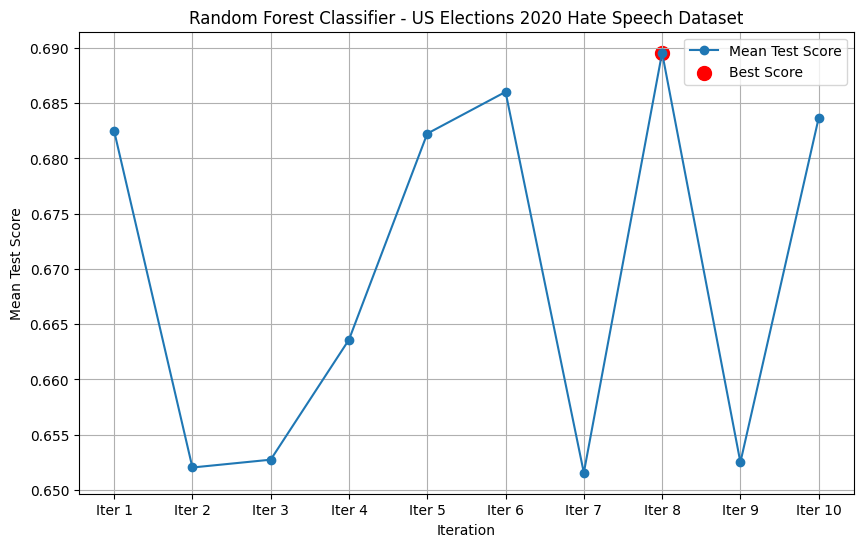

In [188]:
# Plot the accuracy scores for the Random Forest Classifier on the US Elections 2020 Hate Speech dataset for all iterations
plt.figure(figsize=(10, 6))
plt.plot(us2020hs_rf_random_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot the best score as a red x
us2020hs_rf_best_score_index = np.argmax(us2020hs_rf_random_search.cv_results_['mean_test_score'])
plt.scatter(us2020hs_rf_best_score_index, us2020hs_rf_random_search.cv_results_['mean_test_score'][us2020hs_rf_best_score_index], color='red', s=100, label='Best Score')

plt.title('Random Forest Classifier - US Elections 2020 Hate Speech Dataset')
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score')
plt.xticks(range(len(us2020hs_rf_random_search.cv_results_['mean_test_score'])),
           [f"Iter {i+1}" for i in range(len(us2020hs_rf_random_search.cv_results_['mean_test_score']))])
plt.legend()
plt.grid()
plt.show()

In [189]:
# Predict on the test set
us2020hs_rf_y_pred = us2020hs_rf_random_search.predict(us2020hs_X_test)

In [190]:
# Evaluate the model
us2020hs_rf_accuracy = accuracy_score(us2020hs_y_test, us2020hs_rf_y_pred)
us2020hs_rf_f1 = f1_score(us2020hs_y_test, us2020hs_rf_y_pred, average='weighted')

print("US Elections 2020 Hate Speech Random Forest Classifier:")
print(f"Best Parameters: {us2020hs_rf_random_search.best_params_}")
print(f"Accuracy: {us2020hs_rf_accuracy:.4f}")
print(f"F1 Score: {us2020hs_rf_f1:.4f}")

US Elections 2020 Hate Speech Random Forest Classifier:
Best Parameters: {'rf_classifier__n_estimators': 994, 'rf_classifier__min_samples_split': 86, 'rf_classifier__min_samples_leaf': 43, 'rf_classifier__max_depth': 13, 'rf_classifier__criterion': 'entropy'}
Accuracy: 0.7198
F1 Score: 0.7189


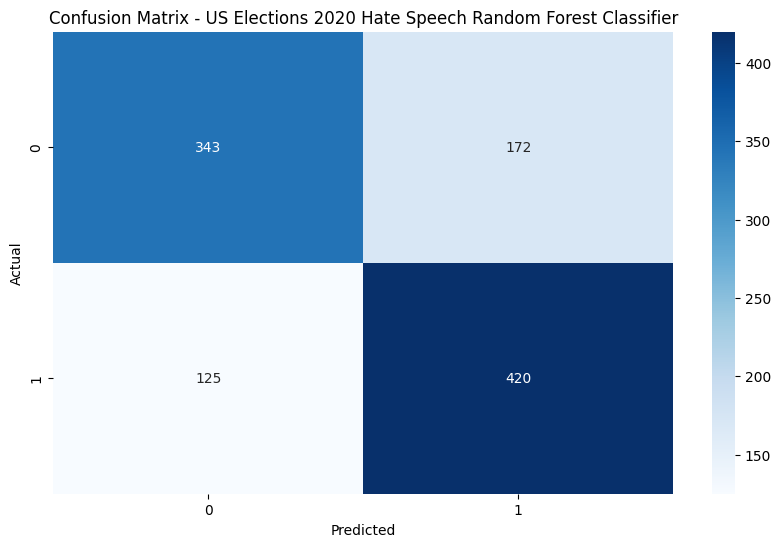

In [191]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(us2020hs_y_test, us2020hs_rf_y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - US Elections 2020 Hate Speech Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [192]:
# Generate a classification report for the Random Forest Classifier on the US Elections 2020 Hate Speech
us2020hs_rf_report = classification_report(us2020hs_y_test, us2020hs_rf_y_pred)
print("Classification Report for US Elections 2020 Hate Speech Random Forest Classifier:")
print(us2020hs_rf_report)

Classification Report for US Elections 2020 Hate Speech Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       515
           1       0.71      0.77      0.74       545

    accuracy                           0.72      1060
   macro avg       0.72      0.72      0.72      1060
weighted avg       0.72      0.72      0.72      1060



In [193]:
# Append details to the results list
rf_classification_results_list.append((
    "Random Forest",
    "US Elections 2020 Hate Speech",
    "NA",
    "NA",
    us2020hs_rf_accuracy,
    us2020hs_rf_f1,
    0.0,
    us2020hs_rf_random_search.best_params_
))

In [194]:
mlma_hate_speech_y_test.value_counts()

target_group
70    620
10    600
11    599
63    599
62    592
     ... 
18    516
19    514
52    513
57    509
1     495
Name: count, Length: 79, dtype: int64

In [204]:
# Random Forest Classifier pipeline for mlma_hate_speech dataset
mlma_hate_speech_rf_pipeline = Pipeline([
    ('rf_classifier', RandomForestClassifier(random_state=42))
])

# Set the parameters for Randomized Search for Random Forest Classifier on the mlma_hate_speech dataset
mlma_hate_speech_rf_param_grid = {
    'rf_classifier__n_estimators': range(300, 320),
    'rf_classifier__max_depth': [mlma_hate_speech_sample_log2],
    'rf_classifier__min_samples_split': [mlma_hate_speech_sample_1_percent * i for i in range(2, 6)],
    'rf_classifier__min_samples_leaf': [mlma_hate_speech_sample_1_percent * i for i in range(1, 6)],
    'rf_classifier__criterion': ['gini', 'entropy']
}

In [206]:
start_time = time.time()
mlma_hate_speech_class_scorer = make_scorer(accuracy_score, greater_is_better=True)

mlma_hate_speech_rf_random_search = RandomizedSearchCV(mlma_hate_speech_rf_pipeline,
                                                   param_distributions=mlma_hate_speech_rf_param_grid,
                                                   n_iter=10,
                                                   cv=mlma_hate_speech_kf,
                                                   scoring=mlma_hate_speech_class_scorer,
                                                   random_state=42)
mlma_hate_speech_rf_random_search.fit(mlma_hate_speech_X_train_sample, mlma_hate_speech_y_train_sample)
end_time = time.time()
print("Best parameters for US Elections 2020 Hate Speech Random Forest Classifier:", mlma_hate_speech_rf_random_search.best_params_)
print("Best score for US Elections 2020 Hate Speech Random Forest Classifier:", mlma_hate_speech_rf_random_search.best_score_)
print("Time taken for US Elections 2020 Hate Speech Random Forest Classifier Randomized Search:", end_time - start_time)

Best parameters for US Elections 2020 Hate Speech Random Forest Classifier: {'rf_classifier__n_estimators': 303, 'rf_classifier__min_samples_split': 2625, 'rf_classifier__min_samples_leaf': 525, 'rf_classifier__max_depth': 16, 'rf_classifier__criterion': 'gini'}
Best score for US Elections 2020 Hate Speech Random Forest Classifier: 0.9671952352527813
Time taken for US Elections 2020 Hate Speech Random Forest Classifier Randomized Search: 193.3823640346527


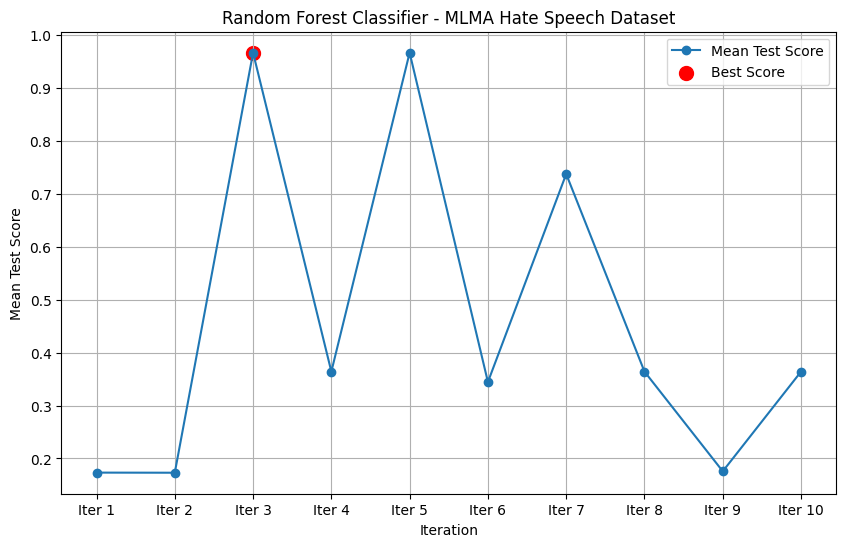

In [207]:
# Plot the accuracy scores for the Random Forest Classifier on the MLMA Hate Speech dataset for all iterations
plt.figure(figsize=(10, 6))
plt.plot(mlma_hate_speech_rf_random_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot the best score as a red x
mlma_hate_speech_rf_best_score_index = np.argmax(mlma_hate_speech_rf_random_search.cv_results_['mean_test_score'])
plt.scatter(mlma_hate_speech_rf_best_score_index, mlma_hate_speech_rf_random_search.cv_results_['mean_test_score'][mlma_hate_speech_rf_best_score_index], color='red', s=100, label='Best Score')

plt.title('Random Forest Classifier - MLMA Hate Speech Dataset')
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score')
plt.xticks(range(len(mlma_hate_speech_rf_random_search.cv_results_['mean_test_score'])),
           [f"Iter {i+1}" for i in range(len(mlma_hate_speech_rf_random_search.cv_results_['mean_test_score']))])
plt.legend()
plt.grid()
plt.show()

In [208]:
# Predict on the test set
mlma_hate_speech_rf_y_pred = mlma_hate_speech_rf_random_search.predict(mlma_hate_speech_X_test)

In [209]:
# Evaluate the model
mlma_hate_speech_rf_accuracy = accuracy_score(mlma_hate_speech_y_test, mlma_hate_speech_rf_y_pred)
mlma_hate_speech_rf_f1 = f1_score(mlma_hate_speech_y_test, mlma_hate_speech_rf_y_pred, average='weighted')

print("MLMA Hate Speech Random Forest Classifier:")
print(f"Best Parameters: {mlma_hate_speech_rf_random_search.best_params_}")
print(f"Accuracy: {mlma_hate_speech_rf_accuracy:.4f}")
print(f"F1 Score: {mlma_hate_speech_rf_f1:.4f}")

MLMA Hate Speech Random Forest Classifier:
Best Parameters: {'rf_classifier__n_estimators': 303, 'rf_classifier__min_samples_split': 2625, 'rf_classifier__min_samples_leaf': 525, 'rf_classifier__max_depth': 16, 'rf_classifier__criterion': 'gini'}
Accuracy: 0.9765
F1 Score: 0.9685


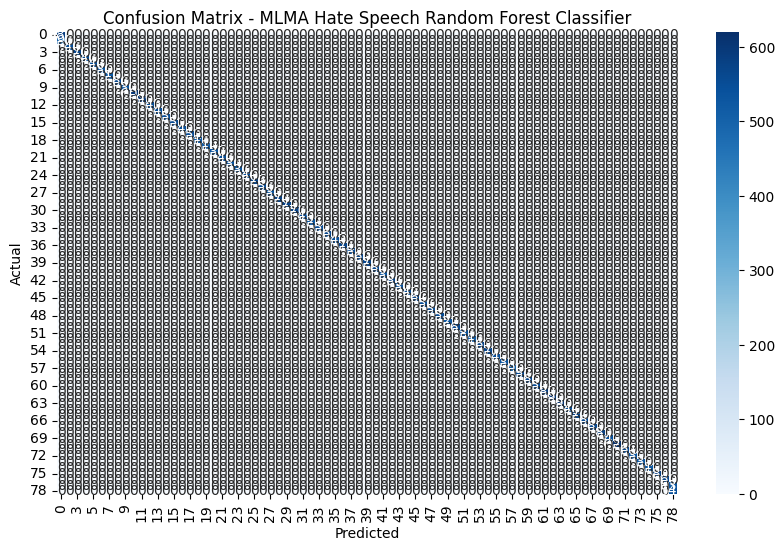

In [210]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(mlma_hate_speech_y_test, mlma_hate_speech_rf_y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - MLMA Hate Speech Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [211]:
# Generate a classification report for the Random Forest Classifier on the MLMA Hate Speech
mlma_hate_speech_rf_report = classification_report(mlma_hate_speech_y_test, mlma_hate_speech_rf_y_pred)
print("Classification Report for MLMA Hate Speech Random Forest Classifier:")
print(mlma_hate_speech_rf_report)

Classification Report for MLMA Hate Speech Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       585
           1       0.00      0.00      0.00       495
           2       1.00      1.00      1.00       546
           3       1.00      1.00      1.00       570
           4       1.00      1.00      1.00       546
           5       1.00      1.00      1.00       543
           6       1.00      1.00      1.00       530
           7       1.00      1.00      1.00       518
           8       1.00      1.00      1.00       566
           9       1.00      1.00      1.00       533
          10       1.00      1.00      1.00       600
          11       1.00      1.00      1.00       599
          12       1.00      1.00      1.00       545
          13       1.00      1.00      1.00       545
          14       1.00      1.00      1.00       557
          15       1.00      1.00      1.00       559
          16

In [212]:
# Append details to the results list
rf_classification_results_list.append((
    "Random Forest",
    "MLMA Hate Speech",
    "NA",
    "NA",
    mlma_hate_speech_rf_accuracy,
    mlma_hate_speech_rf_f1,
    0.0,
    mlma_hate_speech_rf_random_search.best_params_
))

## Support Vector Machine Conclusions

In [213]:
rf_regression_results_list

[('Random Forest',
  'Online Abusive Attacks',
  8.144347350353712,
  0.15683674314718898,
  {'rf_regressor__min_samples_split': 25,
   'rf_regressor__min_samples_leaf': 10,
   'rf_regressor__max_depth': 5,
   'rf_regressor__criterion': 'absolute_error'})]

In [214]:
rf_classification_results_list

[('Random Forest',
  'Convabuse',
  'NA',
  'NA',
  0.5851211760031784,
  0.5801892135715134,
  0.0,
  {'rf_classifier__n_estimators': 170,
   'rf_classifier__min_samples_split': 1209,
   'rf_classifier__min_samples_leaf': 403,
   'rf_classifier__max_depth': 10,
   'rf_classifier__criterion': 'gini'}),
 ('Random Forest',
  'Dynamically Generated Hate Speech',
  'NA',
  'NA',
  0.8377701634159199,
  0.8334301282943788,
  0.0,
  {'rf_classifier__n_estimators': 600,
   'rf_classifier__min_samples_split': 1520,
   'rf_classifier__min_samples_leaf': 304,
   'rf_classifier__max_depth': 5,
   'rf_classifier__criterion': 'entropy'}),
 ('Random Forest',
  'US Elections 2020 Hate Speech',
  'NA',
  'NA',
  0.719811320754717,
  0.718904074498718,
  0.0,
  {'rf_classifier__n_estimators': 994,
   'rf_classifier__min_samples_split': 86,
   'rf_classifier__min_samples_leaf': 43,
   'rf_classifier__max_depth': 13,
   'rf_classifier__criterion': 'entropy'}),
 ('Random Forest',
  'MLMA Hate Speech',
  '

In [215]:
# Convert the rf_classification_results_list to a DataFrame
rf_classification_summary = pd.DataFrame(rf_classification_results_list, columns=["Model", "Dataset", "Kernel", "Regularization", "Accuracy", "F1-score", "Ratio", "Best Parameters"])
rf_classification_summary

,Model,Dataset,Kernel,Regularization,Accuracy,F1-score,Ratio,Best Parameters
0,Random Forest,Convabuse,NA,NA,0.585121,0.580189,0.0,"{'rf_classifier__n_estimators': 170, 'rf_class..."
1,Random Forest,Dynamically Generated Hate Speech,NA,NA,0.837770,0.833430,0.0,"{'rf_classifier__n_estimators': 600, 'rf_class..."
2,Random Forest,US Elections 2020 Hate Speech,NA,NA,0.719811,0.718904,0.0,"{'rf_classifier__n_estimators': 994, 'rf_class..."
3,Random Forest,MLMA Hate Speech,NA,NA,0.976532,0.968465,0.0,"{'rf_classifier__n_estimators': 303, 'rf_class..."


In [216]:
# Convert the rf_regression_results_list to a DataFrame
rf_regression_summary = pd.DataFrame(rf_regression_results_list, columns=["Model", "Dataset", "RMSE", "R2", "Best Parameters"])
rf_regression_summary

,Model,Dataset,RMSE,R2,Best Parameters
0,Random Forest,Online Abusive Attacks,8.144347,0.156837,"{'rf_regressor__min_samples_split': 25, 'rf_re..."


In [217]:
output_path = 'results/'
rf_classification_summary.to_csv(f"{output_path}/model6_rf-classification-summary.csv", index=False)
rf_regression_summary.to_csv(f"{output_path}/model6_rf-regression-summary.csv", index=False)